In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation, FFMpegWriter  
import datetime
from itertools import product

In [2]:
df = pd.read_pickle(f'../../../siads591 data/gabbard/debris_gabbard_raw_5D_1960.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16646241 entries, 0 to 16646240
Data columns (total 5 columns):
 #   Column        Dtype         
---  ------        -----         
 0   EPOCH         datetime64[ns]
 1   NORAD_CAT_ID  uint64        
 2   PERIOD        float32       
 3   APOAPSIS      float32       
 4   PERIAPSIS     float32       
dtypes: datetime64[ns](1), float32(3), uint64(1)
memory usage: 444.5 MB


In [3]:
dates = pd.date_range(start=df.EPOCH.min(), end=df.EPOCH.max(), freq='5D')
dates = dates.delete([1490,1620,1749,-1])
# 1490 = 1981-01-08       3
# 1620 = 1982-10-20      55
# 1749 = 1984-07-26    1111
# -1 is latest entry, with some data missing

1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


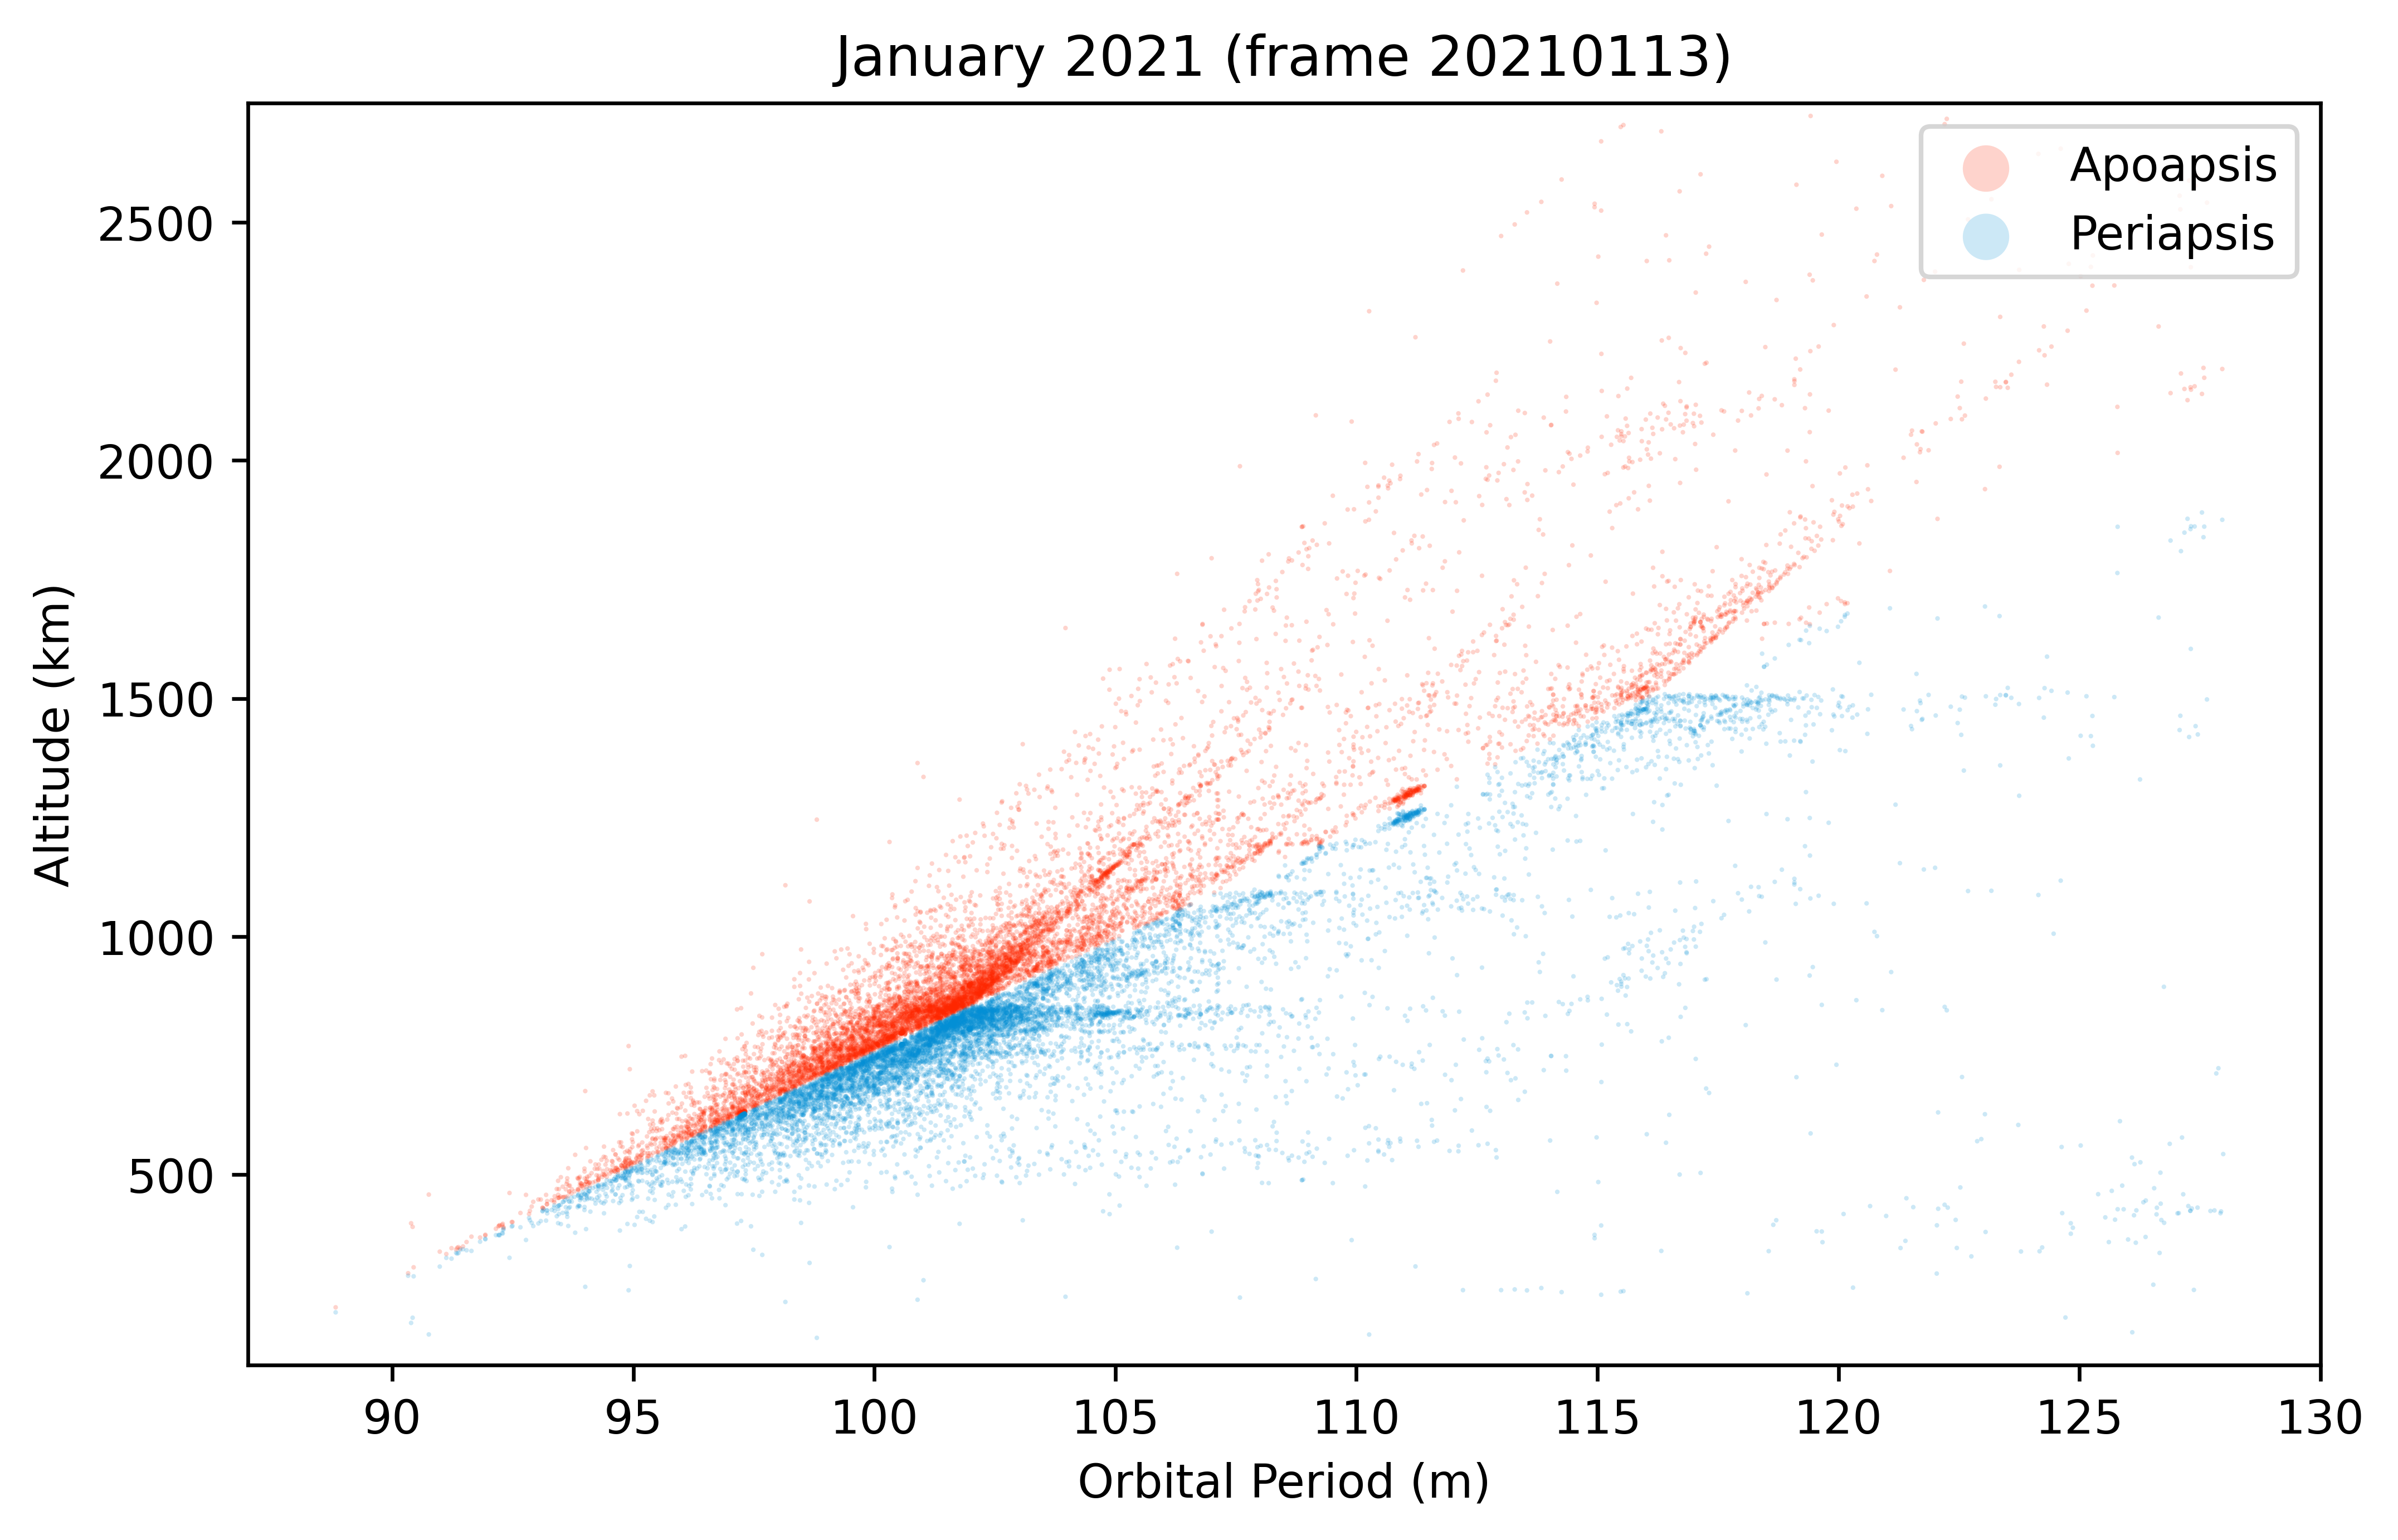

In [4]:
fig, ax = plt.subplots(dpi=600, figsize=(8,5))

ax.set_xlim(87,130)
ax.set_ylim(100,2750)
ax.set_xlabel("Orbital Period (m)")
ax.set_ylabel("Altitude (km)")
artists = []
yr = 0

def plot_it(ax,e):
    global df
    cdf = df[df.EPOCH==e]
    apo = ax.scatter(cdf.PERIOD, cdf.APOAPSIS, color='#fe2700', marker='o', edgecolors='none', alpha=0.2, s=1, label="Apoapsis")
#     ax.scatter(wdf[:500].PERIOD, wdf[:500].APOAPSIS, color='cyan', marker='o', edgecolors='none', alpha=0.5, s=1)
    
    peri = ax.scatter(cdf.PERIOD, cdf.PERIAPSIS, color='#038fd5', marker='o', edgecolors='none', alpha=0.2, s=1, label="Periapsis")
#     ax.scatter(wdf[:500].PERIOD, wdf[:500].PERIAPSIS, color='lightcoral', marker='o', edgecolors='none', alpha=0.5, s=1)
    plt.legend(loc="upper right", numpoints=1, fontsize=10, markerscale=10)
    
    return [apo,peri]

def update(frame):
    global artists, yr
    if frame.year != yr:
        yr = frame.year
        print(yr)
    ax.set_title(f"{frame.month_name()} {frame.year} (frame {frame.year}{str(frame.month).zfill(2)}{str(frame.day).zfill(2)})")
    for a in artists:
        a.remove()
    artists = plot_it(ax,frame)

# update(dates[2100])
ani = FuncAnimation(fig, update, dates)
writervideo = FFMpegWriter(fps=30, bitrate=600)
ani.save("out.mp4", writer=writervideo, dpi=600)

In [5]:
# df[(df.EPOCH==dates[2100]) & (df.PERIAPSIS.between(840,845))]

<AxesSubplot:>

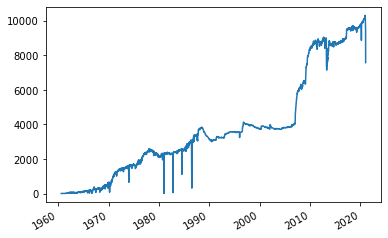

In [6]:
df.EPOCH.value_counts(sort=False).plot()

In [7]:
counts = df[df.EPOCH.between("1972","1987")].EPOCH.value_counts(sort=False)
counts[counts < 1300].sort_index()

1972-12-16    1259
1972-12-21    1286
1974-01-05    1197
1974-01-10     647
1974-01-15     656
1974-01-20     658
1974-01-25    1033
1981-01-08       3
1982-10-20      55
1984-07-26    1111
1986-07-06     756
1986-07-11     315
1986-07-16     312
1986-07-21     318
1986-07-26     332
Name: EPOCH, dtype: int64

Can probably hide these frames without people noticing.  They are causing quick flicker due to missing a lot of data

```
1981-01-08       3
1982-10-20      55
1984-07-26    1111
```